In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# max_time = df["time"].max()
# num_runs = np.sum([df.loc[df["file"] == file, "unit"].max() for file in pd.unique(df["file"])])
# print(max_time)
# print(num_runs)

# x_set = np.zeros((num_runs, max_time, len(df.columns[6:])))
# y_set = np.zeros((num_runs, max_time))
sequence_length = 20
stride = 10

# df = pd.read_csv(f"dataset/CMaps/train_FD00{idx}.txt", sep=" ", header=None)
# dfs = []
x_samples = []
y_samples = []
for idx in [1,2,3,4]:
    df = pd.read_csv(f"dataset/CMaps/train_FD00{idx}.txt", sep=" ", header=None)
    df.rename(columns={0:"unit",
            1:"time",
            2: "os_1",
            3: "os_2",
            4: "os_3",}, inplace=True)
    df = df.dropna(axis='columns')

    for unit in pd.unique(df["unit"]):
        data_run = df[(df["unit"] == unit)].set_index("time")
        total_time = len(data_run)
        for start_time in range(0, len(data_run)-sequence_length, stride):
            x_samples.append(data_run.iloc[start_time:start_time+sequence_length, 6:])
            y_samples.append(total_time-(start_time+sequence_length)-1)
            
x_set = np.stack(x_samples, axis=0)
y_set = np.stack(y_samples, axis=0).reshape(-1,1)

print(x_set.shape)
print(y_set.shape)

(14937, 20, 19)
(14937, 1)


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x_scaler = StandardScaler()
y_scaler = MinMaxScaler((0,1))

x_scaled = x_scaler.fit_transform(x_set.reshape(-1, x_set.shape[-1])).reshape(x_set.shape)
y_scaled = y_scaler.fit_transform(y_set.reshape(-1, y_set.shape[-1])).reshape(y_set.shape)

print(x_scaler.scale_)
print(y_scaler.scale_)

array([0.00191571])

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_scaled.astype(np.float32), y_scaled.astype(np.float32), train_size=0.8, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

with open("dataset/dataset_pm_nasa.npy", "wb") as f:
    print(x_train.dtype)
    print(y_train.dtype)
    print(x_val.dtype)
    print(y_val.dtype)
    np.save(f, x_train)
    np.save(f, y_train)
    np.save(f, x_val)
    np.save(f, y_val)

(11949, 20, 19)
(11949, 1)
(2988, 20, 19)
(2988, 1)
float32
float32
float32
float32


In [29]:
# to_drop = [axis for axis in df.columns[6:] if df[axis].std()<1e-6]
# print(to_drop)
# reduced_data = df.drop(columns=to_drop)

[]


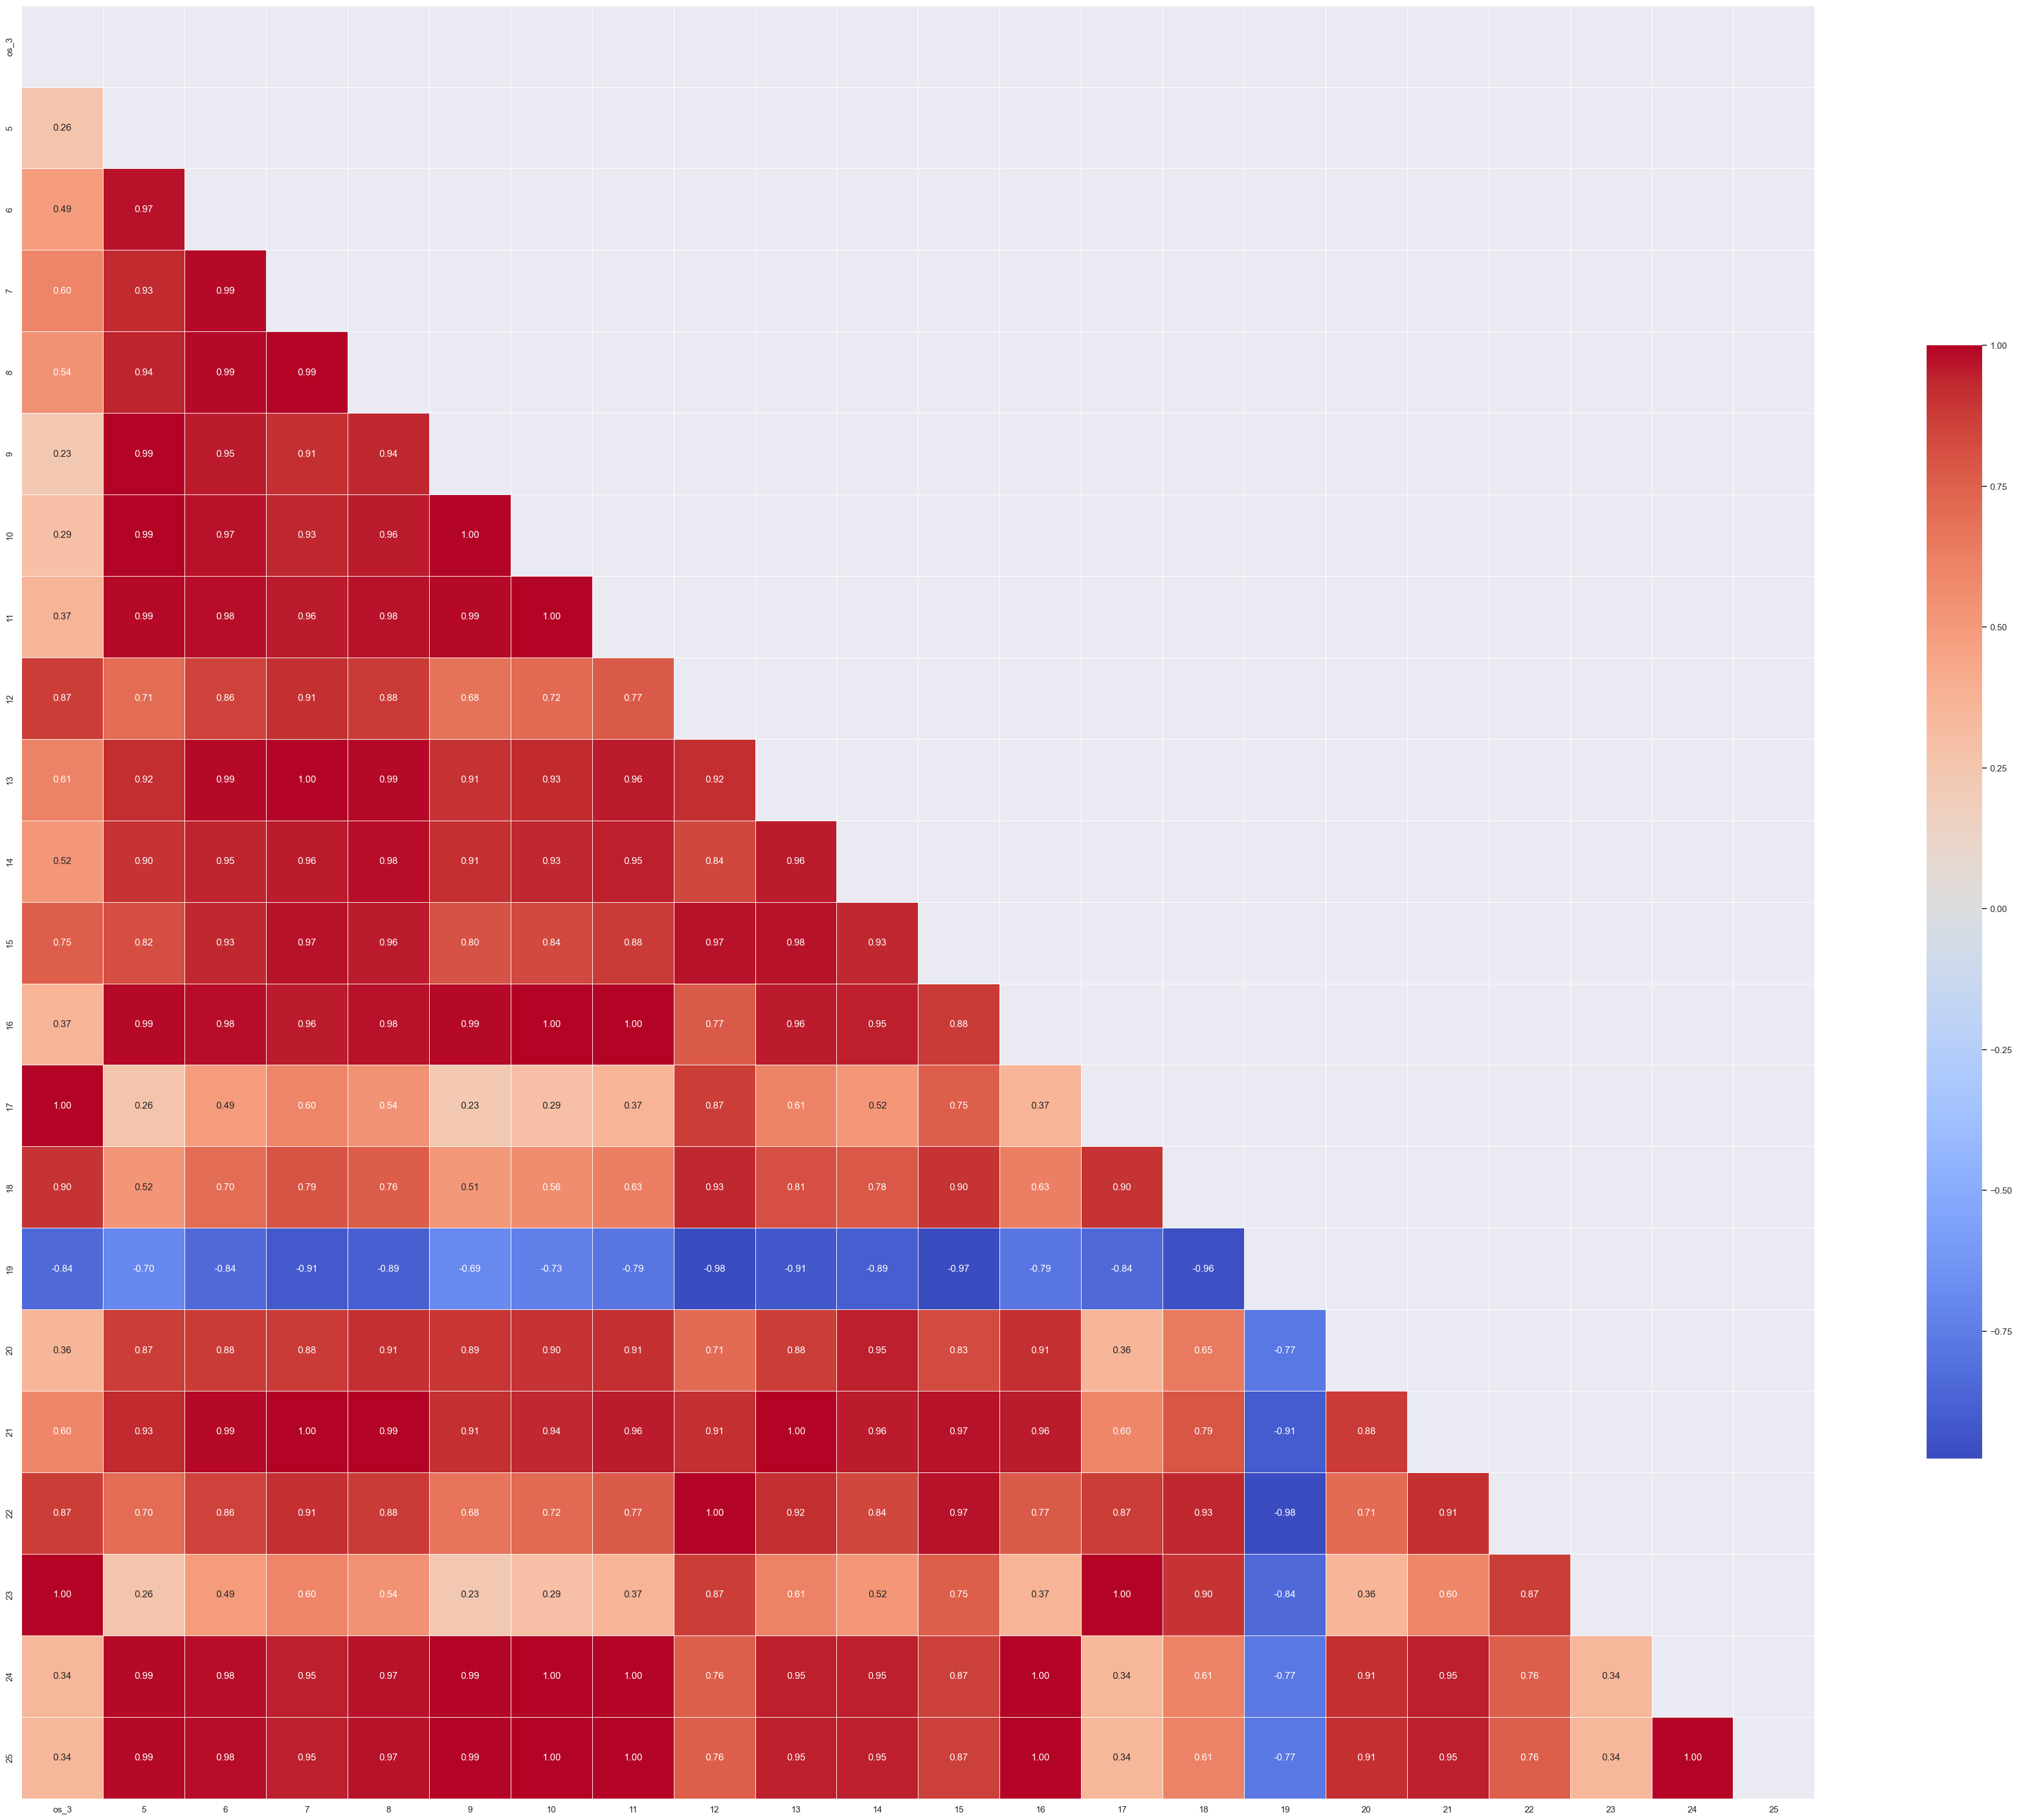

In [31]:
# data = df.iloc[:,5:]
# # Calculate the correlation matrix
# corr = data.corr()

# # Create a heatmap with annotations
# sns.set(style='dark')
# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(50, 50))
# sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f',
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.show()